# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Andy Zheng

Datum: 9.11.23

Gruppe: 03

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Welchen Wert hat der Koeffizient im Newtonschen Abkühlungsgesetz?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


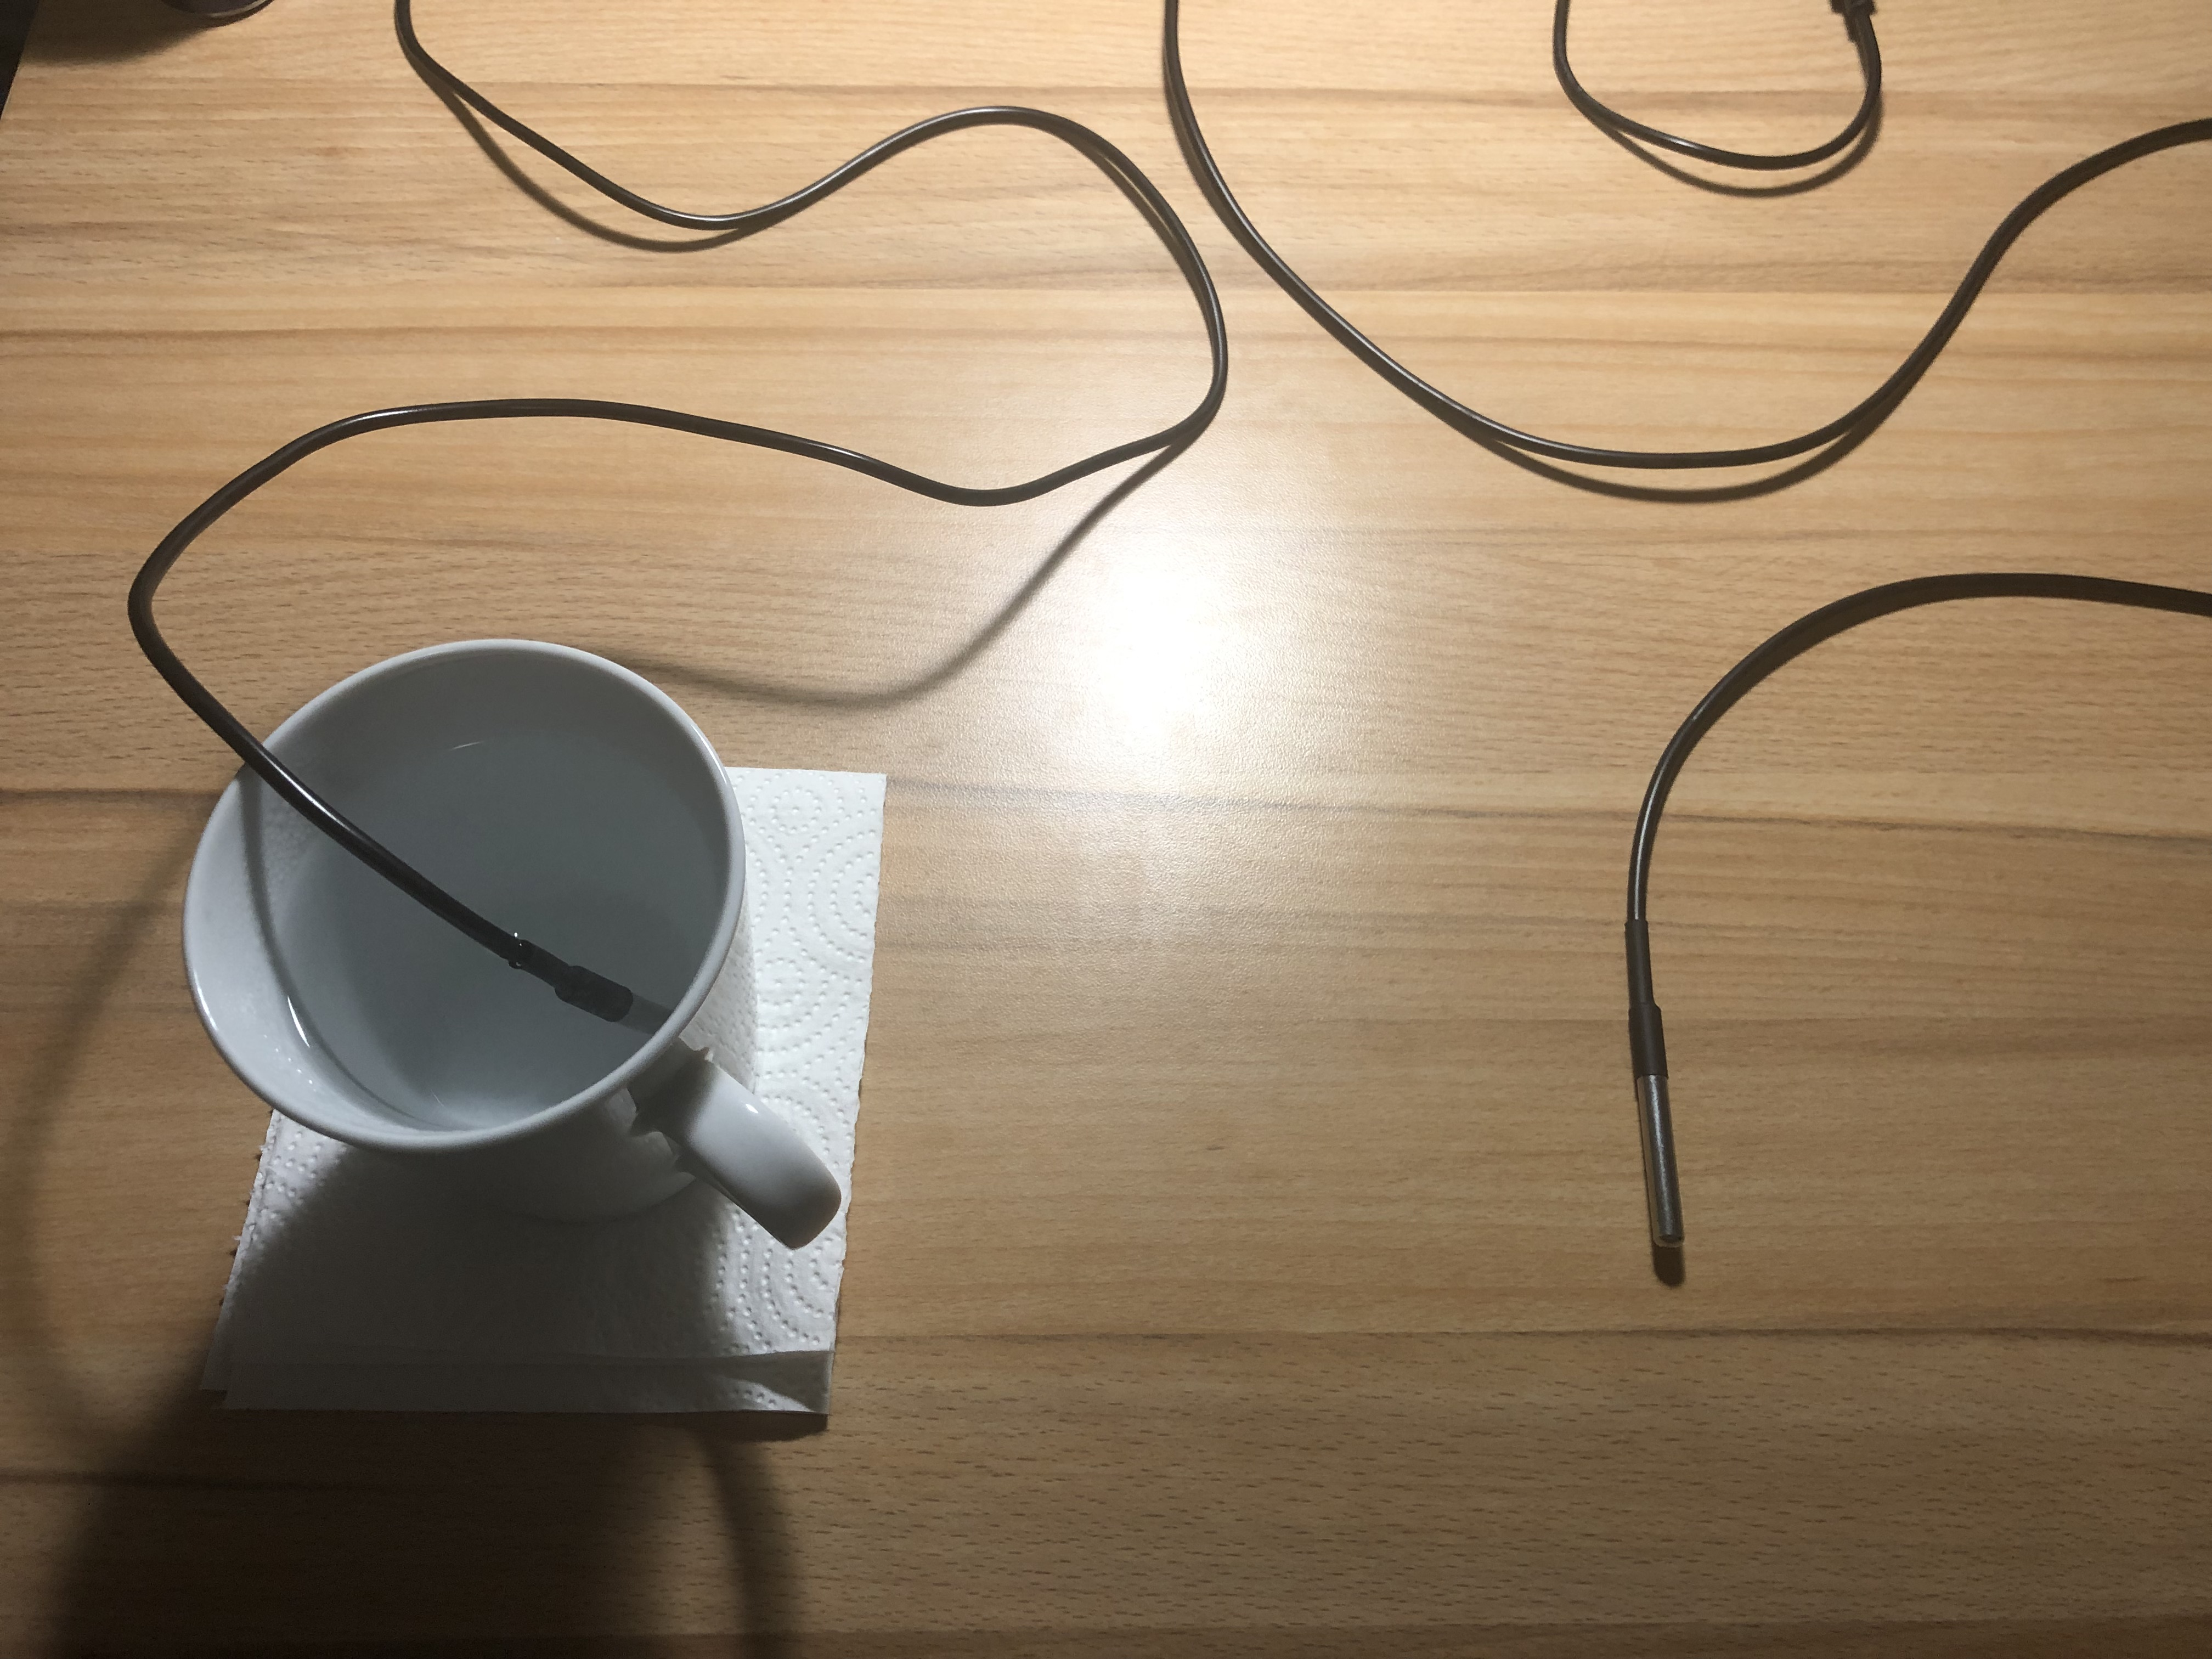

250 ml kochendes Wasser wird in eine Tasse geschüttet.

## Versuchsauswertung

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen und (ii) Daten Semi–log plotten

Messdaten werden in das Notebook eingelesen.


Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

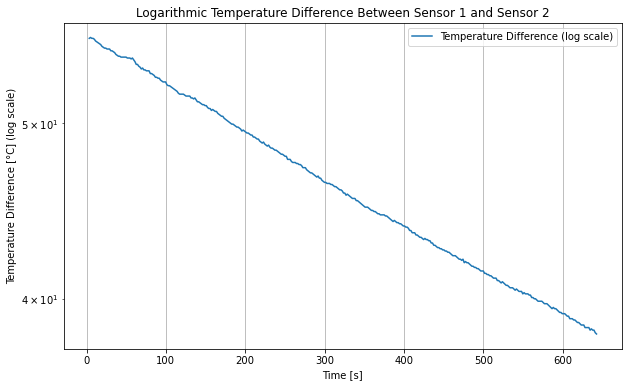

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

file_path = "calorimetry_home.h5"
hdf5_file = h5py.File(file_path, "r")

# Access the datasets for sensor_1 and sensor_2
sensor_1_temperature = hdf5_file["RawData/sensor_1/temperature"]
sensor_2_temperature = hdf5_file["RawData/sensor_2/temperature"]

# Access the timestamp datasets for sensor_1 (Die Zeiten beider Sensoren sind ähnlich)
timestamps = hdf5_file["RawData/sensor_1/timestamp"]

# Convert the timestamp dataset to a NumPy array
timestamps_array = np.array(timestamps)

# Convert the temperature datasets to NumPy arrays
sensor_1_temperature_array = np.array(sensor_1_temperature)
sensor_2_temperature_array = np.array(sensor_2_temperature)

# Calculate the temperature difference between sensor_1 and sensor_2
temperature_difference = sensor_1_temperature_array - sensor_2_temperature_array

# Create a single figure with a logarithmic y-axis
plt.figure(figsize=(10, 6))
plt.semilogy(timestamps_array, np.abs(temperature_difference), label="Temperature Difference (log scale)")
plt.xlabel("Time [s]")
plt.ylabel("Temperature Difference [°C] (log scale)")
plt.title("Logarithmic Temperature Difference Between Sensor 1 and Sensor 2")
plt.legend()
plt.grid(True)
plt.show()

# Close the HDF5 file
hdf5_file.close()


#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [3]:
import numpy as np

# Temperaturdifferenz zwischen den Sensoren (sensor_1 - sensor_2)
temperature_difference = sensor_1_temperature_array - sensor_2_temperature_array

# Anfangs- und Endtemperatur
T1 = sensor_1_temperature_array[0]  # Anfangstemperatur von Sensor 1
T2 = sensor_2_temperature_array[-1]  # Endtemperatur von Sensor 2

# Berechnung von ln(T(t) - T2) und ln(T1 - T2)
ln_temperature_diff = np.log(temperature_difference - T2)
ln_T1_minus_T2 = np.log(T1 - T2)

# Verwendung von numpy.polyfit, um den Koeffizienten K zu bestimmen (lineare Regression)
t_values = timestamps_array  # Die Zeit (Timestamps)
K, _ = np.polyfit(t_values, ln_temperature_diff, 1)

#### (iV) Ergebnis

In [4]:
# K ist der gesuchte Koeffizient im Newtonschen Abkühlungsgesetz
print("Koeffizient K:", K)

Koeffizient K: -0.0013458800738994127


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Der Koeffizient hat in meinem Experiment einen Wert von -0,00135. Jedoch muss das nicht unbedingt richtig sein, denn mein Experiment könnte fehlerhaft gewesen sein:

1. Messfehler: Messungen von Temperaturänderungen können Fehler enthalten, die die Ergebnisse beeinflussen. Es ist wichtig sicherzustellen, dass die Messgeräte korrekt kalibriert sind und dass die Experimentbedingungen sorgfältig kontrolliert werden.

2. Verunreinigungen: Wenn das Wasser verunreinigt ist, kann dies die Messung beeinflussen. Fremdstoffe im Wasser könnten die Abkühlung im Experiment behindern.

3. Experimentelle Bedingungen: Die Durchführung des Experiments unter nicht idealen Bedingungen kann zu falschen Ergebnissen führen.

4. Probenqualität: Die Qualität des Wassers selbst, insbesondere in Bezug auf seine Reinheit und Zusammensetzung, kann die Messung beeinflussen.

Daher kann ich nicht mit Sicherheit das Newtonsche Abkühlungsgesetz bestätigen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Es ist wichtig, dass Experimente und Messungen sorgfältig überprüft werden, um sicherzustellen, dass alle relevanten Einflussfaktoren berücksichtigt werden. In vielen Fällen können Abweichungen von theoretischen Werten auf experimentelle Fehler oder unberücksichtigte Variablen zurückgeführt werden.